In [ ]:
# | default_exp plotting

# plotting
> Plotting tools for Planet Four data

In [ ]:
# | export
from matplotlib import pyplot as plt

from p4tools import io, markings

In [ ]:
# | export
def plot_blotches_for_tile(tile_id, ax=None, **plot_kwargs):
    tile_blotches = io.get_blotches_for_tile(tile_id)
    if ax is None:
        _, ax = plt.subplots()
    for _, blotch in tile_blotches.iterrows():
        m = markings.Blotch(blotch, with_center=False)
        m.plot(ax=ax, **plot_kwargs)

In [ ]:
tile_with_blotches = "APF0000004"

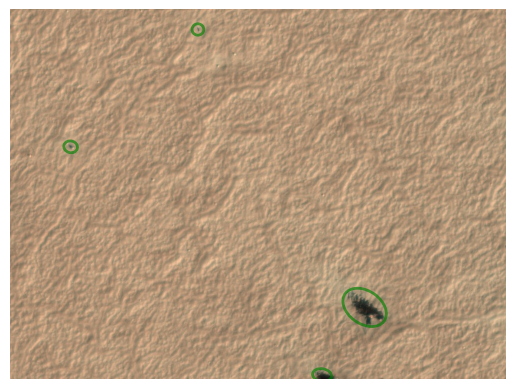

In [ ]:
plot_blotches_for_tile(tile_with_blotches)

In [ ]:
# | export
def plot_fans_for_tile(tile_id, ax=None, **plot_kwargs):
    tile_fans = io.get_fans_for_tile(tile_id)
    if len(tile_fans) == 0:
        print("Warning: No fans found.")
    if ax is None:
        _, ax = plt.subplots()
    for _, fan in tile_fans.iterrows():
        m = markings.Fan(fan, with_center=False)
        m.plot(ax=ax, **plot_kwargs)

In [ ]:
tile_with_fans = "APF000000c"

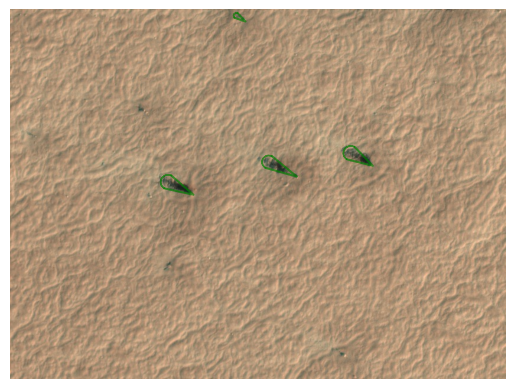

In [ ]:
plot_fans_for_tile(tile_with_fans)

In [ ]:
# | export
def plot_original_tile(tileID, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    ax.imshow(io.get_subframe_by_tile_id(tileID), origin="upper", aspect="auto")
    ax.set_axis_off()

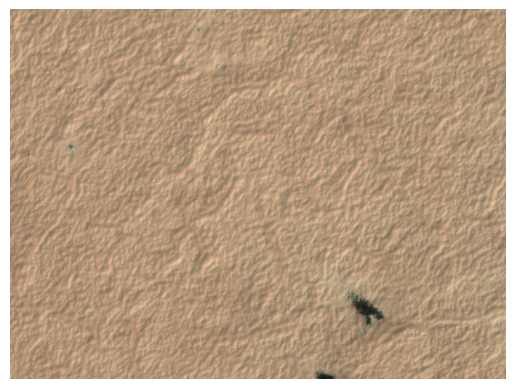

In [ ]:
plot_original_tile(tile_with_blotches)

In [ ]:
# | export
def plot_original_and_fans(tileID):
    fig, axes = plt.subplots(ncols=2, figsize=(9, 3))
    plot_original_tile(tileID, ax=axes[0])
    plot_fans_for_tile(tileID, ax=axes[1])
    fig.suptitle(f"Planet Four tile ID: {tileID}")

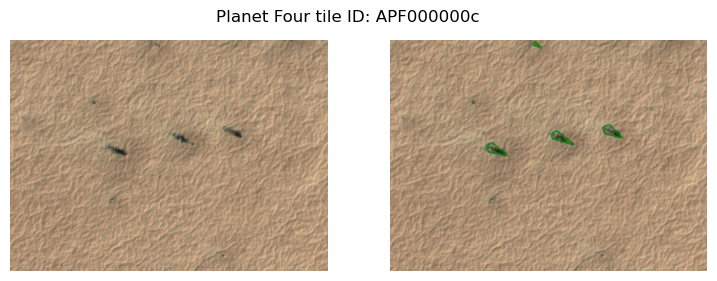

In [ ]:
plot_original_and_fans(tile_with_fans)

In [ ]:
# | export
def plot_original_and_blotches(tileID):
    fig, axes = plt.subplots(ncols=2, figsize=(9, 3))
    plot_original_tile(tileID, ax=axes[0])
    plot_blotches_for_tile(tileID, ax=axes[1], color="magenta")
    fig.suptitle(f"Planet Four tile ID: {tileID}")

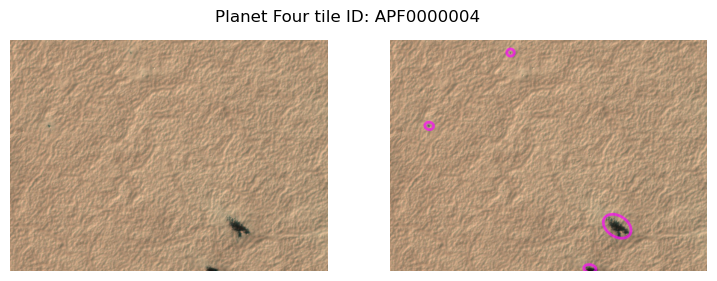

In [ ]:
plot_original_and_blotches(tile_with_blotches)

In [ ]:
# | export
def plot_original_fans_blotches(tileID, save=False):
    fig, axes = plt.subplots(ncols=2, figsize=(9, 3))
    plot_original_tile(tileID, ax=axes[0])
    plot_fans_for_tile(tileID, ax=axes[1])
    plot_blotches_for_tile(tileID, ax=axes[1], color="magenta")
    fig.suptitle(f"Planet Four tile ID: {tileID}")
    if save:
        fig.savefig(f"{tileID}.png", dpi=150)

In [ ]:
tile_with_both = "APF0000006"

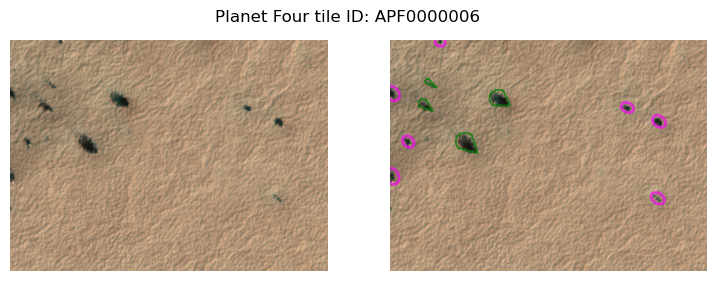

In [ ]:
plot_original_fans_blotches(tile_with_both)

In [ ]:
# | export
def plot_x_random_tiles_with_n_fans(
    x: int = 3,  # how many of 2 col original+p4 data plots to receive
    n: int = 15,  # whats the minimum number of fans to contain
    save: bool = False,  # if True, saves a PNG with the plot for each tile_id separately
    random_state: int = None,  # can be set to recreate the exact same set
):
    fans = io.get_fan_catalog()
    blotches = io.get_blotch_catalog()
    # for the fan tiles that have blotches, how many fans are in:
    n_fans = fans[fans.tile_id.isin(blotches.tile_id)].groupby("tile_id").size()
    tile_ids = n_fans[n_fans >= n].sample(x, random_state=random_state).index
    for tile_id in tile_ids:
        plot_original_fans_blotches(tile_id, save=save)

100%|████████████████████████████████████████| 190k/190k [00:00<00:00, 413MB/s]
100%|████████████████████████████████████████| 259k/259k [00:00<00:00, 339MB/s]


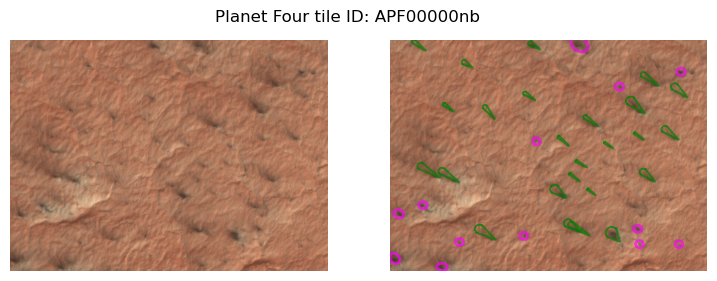

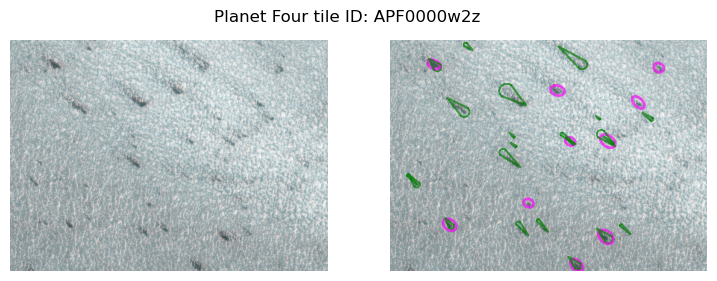

In [ ]:
plot_x_random_tiles_with_n_fans(2)